# Sopstvene vrednosti i sopstveni vektori matrice

Kvadratna matrica $A$ ima sopstveni vektor $x$ i sopstvenu vrednost $\lambda$, ukoliko važi $Ax = \lambda x$, $x \ne 0$. Poznato je da različitim sopstvenim vrednostima odgovaraju linearno nezavisni sopstveni vektori, kao i da su sopstvene vrednosti jednake nulama karakterističnog polinoma $\det(A − \lambda I)$.

Geometrijski interpretirano, sopstveni vektori su vektori koji u transformaciji indukovanoj maticom A ne menjaju svoj pravac. Smer i dužina vektora se mogu promeniti i tu promenu reflektuje sopstvena vrednost. Na slici, na primer, plavi i ljubičasti vektori odgovaraju pravcima sopstvenih vektora.

<img src='assets/eigenvectors.gif'>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(10)

Podsetimo se da funkcija `eig` paketa `numpy.linalg` vraća niz sopstvenih vrednosti i matricu sopstvenih vektora. Sopstveni vektori su u matrici predstavljeni kolonama pri čemu je $i$-ta kolona u matrici sopstveni vektor koji odgovara $i$-toj sopstvenoj vrednosti u nizu.

In [3]:
A = np.array ([[-4, 14, 0], [-5, 13, 0], [-1, 0, 2]])

In [4]:
A

array([[-4, 14,  0],
       [-5, 13,  0],
       [-1,  0,  2]])

In [5]:
values, vectors = np.linalg.eig(A)

Sopstvene vrednosti:

In [6]:
values

array([2., 6., 3.])

Sopstveni vektori:

In [7]:
vectors

array([[ 0.        ,  0.79740048,  0.66666667],
       [ 0.        ,  0.56957177,  0.33333333],
       [ 1.        , -0.19935012, -0.66666667]])

Vektori koji se dobijaju na ovaj način su normirani:

In [8]:
np.linalg.norm(vectors[:, 0])

1.0

In [9]:
np.linalg.norm(vectors[:, 1])

0.9999999999999999

In [10]:
np.linalg.norm(vectors[:, 2])

1.0

Podsetimo se i nekih svojstava matrica u vezi sa sopstvenim vrednostima i sopstvenim vektorima.

Matrice $A$ i $A^T$ imaju iste sopstvene vrednosti. Ako su $v_i$ i $u_j$ redom sopstveni vektori koji odgovaraju ovim matricama, za indekse $i$ i $j$ za koje je $\lambda_i\neq \lambda_j$ važi $v_i \cdot u_j = 0$.

In [11]:
values_T, vectors_T = np.linalg.eig(A.T)

In [12]:
values_T

array([3., 6., 2.])

In [13]:
vectors_T

array([[-0.58123819,  0.4472136 ,  0.60279629],
       [ 0.81373347, -0.89442719, -0.76719527],
       [ 0.        ,  0.        ,  0.21919865]])

In [14]:
i = 0
j = 1
product_vi_uj= np.dot(vectors[:,i], vectors_T[:, j])
print(product_vi_uj)

0.0


Matrice $A$ i $A^{-1}$ imaju uzajamno recipročne sopstvene vrednosti. 

In [15]:
values_I, vectors_I = np.linalg.eig(np.linalg.inv(A))

In [16]:
values_I

array([0.5       , 0.16666667, 0.33333333])

Nadalje će biti prikazani neki algoritmi koji se mogu iskoristit za određivanje sopstvenih vektora i vrednosti zadate matrice.

### Metoda stepenovanja

Pretpostavimo da sopstvenim vrednostima matrice $A$ za koje važi $|\lambda_1|>|\lambda_2|\ge \dots \ge|\lambda_n|$ odgovaraju sopstveni vektori $x_1, x_2, \dots, x_n$. Neka je $b_{0}$ proizvoljno generisan vektor čiji je vodeći element (pravac koji odgovara najvećoj sopstvenoj vrednosti) različit od 0  i neka je $b_{k}$ niz vektora generisanih sa $$b_{k+1}=\frac {Ab_{k}}{||Ab_{k}||}$$. Vektori $b_{k}$ kroz iteracije čine niz koji konvergira ka $x_1$, odnosno sopstvenom vektoru koji odgovara sopstvenoj vrednosti čija je apsolutna vrednost najveća. Opisani algoritam se naziva `metoda stepenovanja` i pomoću njega se može pronaći najveća po apsolutnoj vrednosti sopstvena vrednost (takozvana `dominantna sopstvena vrednost`) i njoj odgovarajući sopstveni vektor. Za nalaženje sopstvene vrednosti $\lambda_1$, ako je poznat vektor $x_1$, dovoljno je primetiti da iz $Ax_1 = \lambda_1x_1$ sledi $x_1^TAx_1 = x_1^T\lambda_1x_1$, odakle je $$\lambda_1 = \frac{x_1^TAx_1}{x_1^Tx_1}.$$ 

Funkcija `power_method` implementira opisani algoritam. Kao zaustavni kriterijum se koristi maksimalni dozvoljeni broj iteracija. 

In [17]:
def power_method(A, number_of_iterations=50):

    # odredjivanje dimenzije matrice
    N = A.shape[0]

    # izbor vektora b0
    b = np.random.rand(N)
    while b[0] == 0:
        b[0] = np.random.rand(1)[0]
    b = b / np.linalg.norm(b)

    # korak iteracije - izracunavanje sopstvenog vektora
    for _ in range(0, number_of_iterations):
        product = np.dot(A, b)
        b = product / np.linalg.norm(product)

    # korak izracunavanja sospstvene vrednosti
    b_lambda = b.T.dot(A).dot(b) / (b.T.dot(b))

    return b_lambda, b

In [18]:
power_method(A, 50)

(6.000000000000004, array([-0.79740048, -0.56957177,  0.19935012]))

U izračunavanjima se koristiti normirana vrednost početnog vektora $b$ i kroz kod se dalje održava jer to predupređuje potkoračenje i prekoračenje na nivo njegovih vrednosti. Uslov da prva komponenta vektora bude različita od nule nije nužno proveravati zbog grešaka zaokruživanja realne aritmetike koje gotovo uvek dovode do ne-nula vrednosti.

Zaustavni kriterijum metode stepenovanja se može i preciznije definisati. Mogu se posmatrati izračunate sopstvene vrednosti u dvema uzastopnim iteracijama $\lambda_{iteracija\ i}$ i $\lambda_{iteracija\ i+1}$ i njihova apsolutna razlika $|\lambda_{iteracija\ i+1} - \lambda_{iteracija\ i}|$. Ukoliko je razlika manja od neke unapred zadate tačnosti algoritam se može zaustaviti. 

Kao zaustavni kriterijum može se uzeti i vrednost relativne greške $\frac{|\lambda_{iteracija\ i} - \lambda_{iteracija \ i+1|}}{|\lambda_{iteracija\ i+1}|}$.

Sledeća funkcija kombinuje zaustavne kriterijume broja iteracija i tačnosti. 

In [19]:
def power_method(A, epsilon = 10**-3, number_of_iterations=50):

    # odredjivanje dimenzije matrice
    N = A.shape[0]

    # izbor vektora b0
    b = np.random.rand(N)
    while b[0] == 0:
        b[0] = np.random.rand(1)[0]
    b = b / np.linalg.norm(b)
    
    # odredjivanje pocetne sopstvene vrednosti
    iteration = 0
    b_lambda_prev = b.T.dot(A).dot(b) / (b.T.dot(b))

    
    for iteration in range(1, number_of_iterations):
        
        # korak iteracije - izracunavanje sopstvenog vektora
        product = np.dot(A, b)
        b = product / np.linalg.norm(product)
        
        # korak izracunavanja sospstvene vrednosti
        b_lambda = b.T.dot(A).dot(b) / (b.T.dot(b))
        
        # provera zaustavnog kriterijuma
        if np.abs(b_lambda - b_lambda_prev) <= epsilon: 
            break
    
        # priprema za narednu iteraciju
        b_lambda_prev = b_lambda
        
    
    return b_lambda_prev, b, iteration

In [20]:
power_method(A, 10**-6, 100)

(5.999998287703154, array([ 0.79740048,  0.56957172, -0.19935029]), 20)

Možemo prikazati i grafički kako se menja vrednost ovako izračunate sopstvene vrednosti sa brojem iteracija. Sa grafika je primetna i konvergencija metode.

In [21]:
epsilon = 10**-6
max_number_of_iterations = 20
iterations = [i for i in range(0, max_number_of_iterations)]
values = [power_method(A, epsilon, i)[0] for i in iterations]

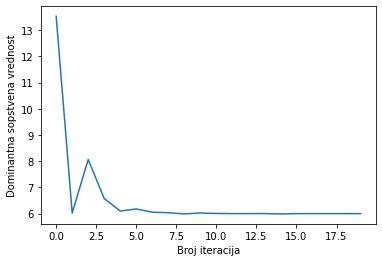

In [22]:
plt.plot(iterations, values)
plt.xlabel('Broj iteracija')
plt.ylabel('Dominantna sopstvena vrednost')
plt.show()

U praksi je za zadatu matricu teško proveriti da li zadovoljava preduslove metode stepenovanja. Zato se metod stepenovanja može pokrenuti nad nekoliko različitih početnih vrednosti vektora $b$. Ukoliko se dobiju vrednosti koje teže istom broju, dalje je potrebno proveriti da li za ovaj broj i odgovarajući vektor važi identitet $Ax = \lambda x$. Ukoliko je to slučaj, izračunate vrednosti se mogu zadržati kao dominantna sopstvena vrednost i dominantni sopstveni vektor.

### Metoda iscrpljivanja

Metoda iscrpljivanja nam pomaže da izračunamo i preostale sopstvene vrednosti. 

Pretpostavimo da sopstvenim vrednostima matrice $A$ za koje važi $|\lambda_1|>|\lambda_2|>\dots>|\lambda_n|$ odgovaraju sopstveni vektori $x_1, x_2, \dots, x_n$. Neka je $A_1 = A$ i $$A_{i+1} = A_i - \lambda_ix_iy_i^T$$  niz matrica u kojima vektori $y_i$ imaju svojstvo $y_i^Tx_i = 1$. Može se proveriti da matrica $A_2$ ima svojstvo da je njena dominantna sopstvena vrednost $\lambda_2$, matrica $A_3$ ima svojstvo da je njena dominantna sopstvena vrednost $\lambda_3$ pa se prateći ovaj postupak mogu generisati sve sopstvene vrednosti i svi sopstveni vektori polazne matrice. Opisani metod se naziva `metod iscrpljivanja`.

Ostaje još da prodiskutujemo kako se mogu konstruisati vektori $y_i$ i kako se mogu dobiti sopstveni vektori koji odgovaraju izdvojenim sopstvenim vrednostima. 

Neka je $x_p$ vrednost elementa tekućeg sopstvenog vektora $x_i$ koji je različit od nule. Neka se on nalazi na poziciji $p$. Za vektor $y_i$ možemo odabrati vektor $\frac{1}{\lambda_i x_p}a_p^T$ gde je $a_p$ p-ti red tekuće matrice $A_i$. Ovo je takozvano Veilandtovo iscrpljivanje (engl. Weilandt deflation) i može se koristiti za nalaženje nekoliko sopstvenih vrednosti. Zbog numeričke nestabilnosti za nalaženje većeg broja sopstvenih vrednosti koriste se druge tehnike. 

Ako sa $(\lambda_1, x_1)$ obeležimo dominantnu sopstvenu vrednost i dominantni sopstveni vektor matrice $A_1$, za maticu $A_2$ važi da je jedan par sopstvenih vrednosti i vektora $(0, x_1)$ a da su drugi oblika $(\lambda_i, z_i)$ sa sopstvenim vrednostima istovetnim matrici $A_1$ i nešto drugačijim sopstvenim vektorima. Za izračunavanje sopstvenog vektora $x_2$ polazne matrice se može iskoristiti identitet $x_2 = (\lambda_2 - \lambda_1) z_2 + \lambda_1(y^T z_2)x_1$. Ova veza se može dalje primeniti i na parove matrica $A_2$ i $A_3$, $A_3$ i $A_4$, ... 

In [23]:
def deflation_method(A, number_of_values, epsilon = 10**-3, number_of_iterations=50):
    
    # trazeni nizovi sopstvenih vrednosti
    values = []
    
    # odredjivanje dimenzije matrice
    N = A.shape[0]

    # odredjivanje dominantne sopstvene vrednosti i sopstvenog vektora 
    x_lambda, x, _ = power_method(A, epsilon, number_of_iterations)
    values.append(x_lambda)
    
    for _ in range(0, number_of_values-1):
        
        # trazimo ne-nula komponentu vektora x 
        for p in range(0, N):
            if x[p]!=0:
                break         
        
        # izdvajamo p-ti red matrice A 
        row = A[p, :]
        
        # formiramo vektor y
        y = 1/(x_lambda*x[p])*row.T        
        
        # odredjujemo novu formu matrice A
        A = A - x_lambda*np.dot(x.reshape(-1, 1), y.T.reshape(1, -1))
        
        x_lambda_current, x_current, _ = power_method(A, epsilon, number_of_iterations)
        values.append(x_lambda_current)
        
        
        x_lambda =  x_lambda_current
        x = x_current
        
    return values

In [24]:
values = deflation_method(A, 2, epsilon = 10**-6, number_of_iterations=50)

In [25]:
values

[6.000001367934039, 3.000002217393844]

Napomenimo još da brzina konvergencije pomenutih metoda zavisi od odnosa vrednosti $\frac{|\lambda_1|}{|\lambda_2|}$. 